In [95]:
import warnings
warnings.filterwarnings("ignore")

In [96]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

# PREPROCESSING - EXPLANATORY DATA ANALYSIS

In [97]:
music = pd.read_csv('dataset-of-00s.csv')
music.shape

(5872, 19)

In [98]:
music.head(20)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.58,0.47,4,-7.27,1,0.03,0.37,0.00,0.16,0.53,133.06,196707,4,30.88,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.70,0.85,10,-5.48,0,0.18,0.02,0.00,0.15,0.69,92.99,242587,4,41.51,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.16,0.84,9,-3.01,1,0.05,0.00,0.00,0.17,0.30,86.96,338893,4,65.33,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.19,0.99,4,-3.75,1,0.17,0.00,0.08,0.19,0.33,148.44,255667,4,58.60,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.63,0.76,2,-4.35,1,0.03,0.36,0.00,0.12,0.63,112.10,193760,4,22.62,10,1
5,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.73,0.84,11,-7.22,0,0.10,0.37,0.27,0.14,0.97,135.35,192720,4,28.29,10,0
6,Divorced,Blacklisted,spotify:track:0iAdSLiQBIizTAiLUP7p5E,0.36,0.92,1,-2.64,1,0.07,0.00,0.00,0.32,0.29,77.25,89427,4,45.77,4,0
7,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.73,0.63,11,-8.14,0,0.03,0.22,0.00,0.19,0.75,124.71,239240,4,35.60,10,1
8,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.48,0.79,10,-5.65,1,0.03,0.05,0.00,0.08,0.39,153.10,253640,4,19.66,11,1
9,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.65,0.32,7,-9.68,1,0.04,0.35,0.00,0.12,0.34,124.21,314286,3,32.66,16,0


In [99]:
music.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
danceability,"5,872.00",0.54,0.19,0.06,0.42,0.56,0.68,0.99
energy,"5,872.00",0.69,0.24,0.00,0.57,0.74,0.89,1.00
key,"5,872.00",5.28,3.56,0.00,2.00,5.00,8.00,11.00
loudness,"5,872.00",-7.45,5.10,-47.33,-8.31,-6.04,-4.56,1.14
mode,"5,872.00",0.65,0.48,0.00,0.00,1.00,1.00,1.00
speechiness,"5,872.00",0.09,0.09,0.02,0.04,0.05,0.11,0.95
acousticness,"5,872.00",0.21,0.30,0.00,0.00,0.06,0.31,1.00
instrumentalness,"5,872.00",0.15,0.30,0.00,0.00,0.00,0.05,1.00
liveness,"5,872.00",0.20,0.16,0.02,0.09,0.13,0.26,0.99
valence,"5,872.00",0.48,0.25,0.00,0.28,0.49,0.69,0.98


In [100]:
music.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [101]:
duplicate = music.duplicated()
music[duplicate] #no duplicates

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target


In [102]:
music.dtypes #objects will be dropped in further analysis anyways. track and artist pairs are compeletely unique, has nothing to do with scaling, statistical tests and ML algoritms

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [103]:
music = music.drop(["uri"], axis=1)

In [104]:
print("unique key values:", music["key"].unique())
print("unique time_signature values:", music["time_signature"].unique())
print("unique mode values:", music["mode"].unique())

unique key values: [ 4 10  9  2 11  1  7  8  0  3  5  6]
unique time_signature values: [4 3 1 5 0]
unique mode values: [1 0]


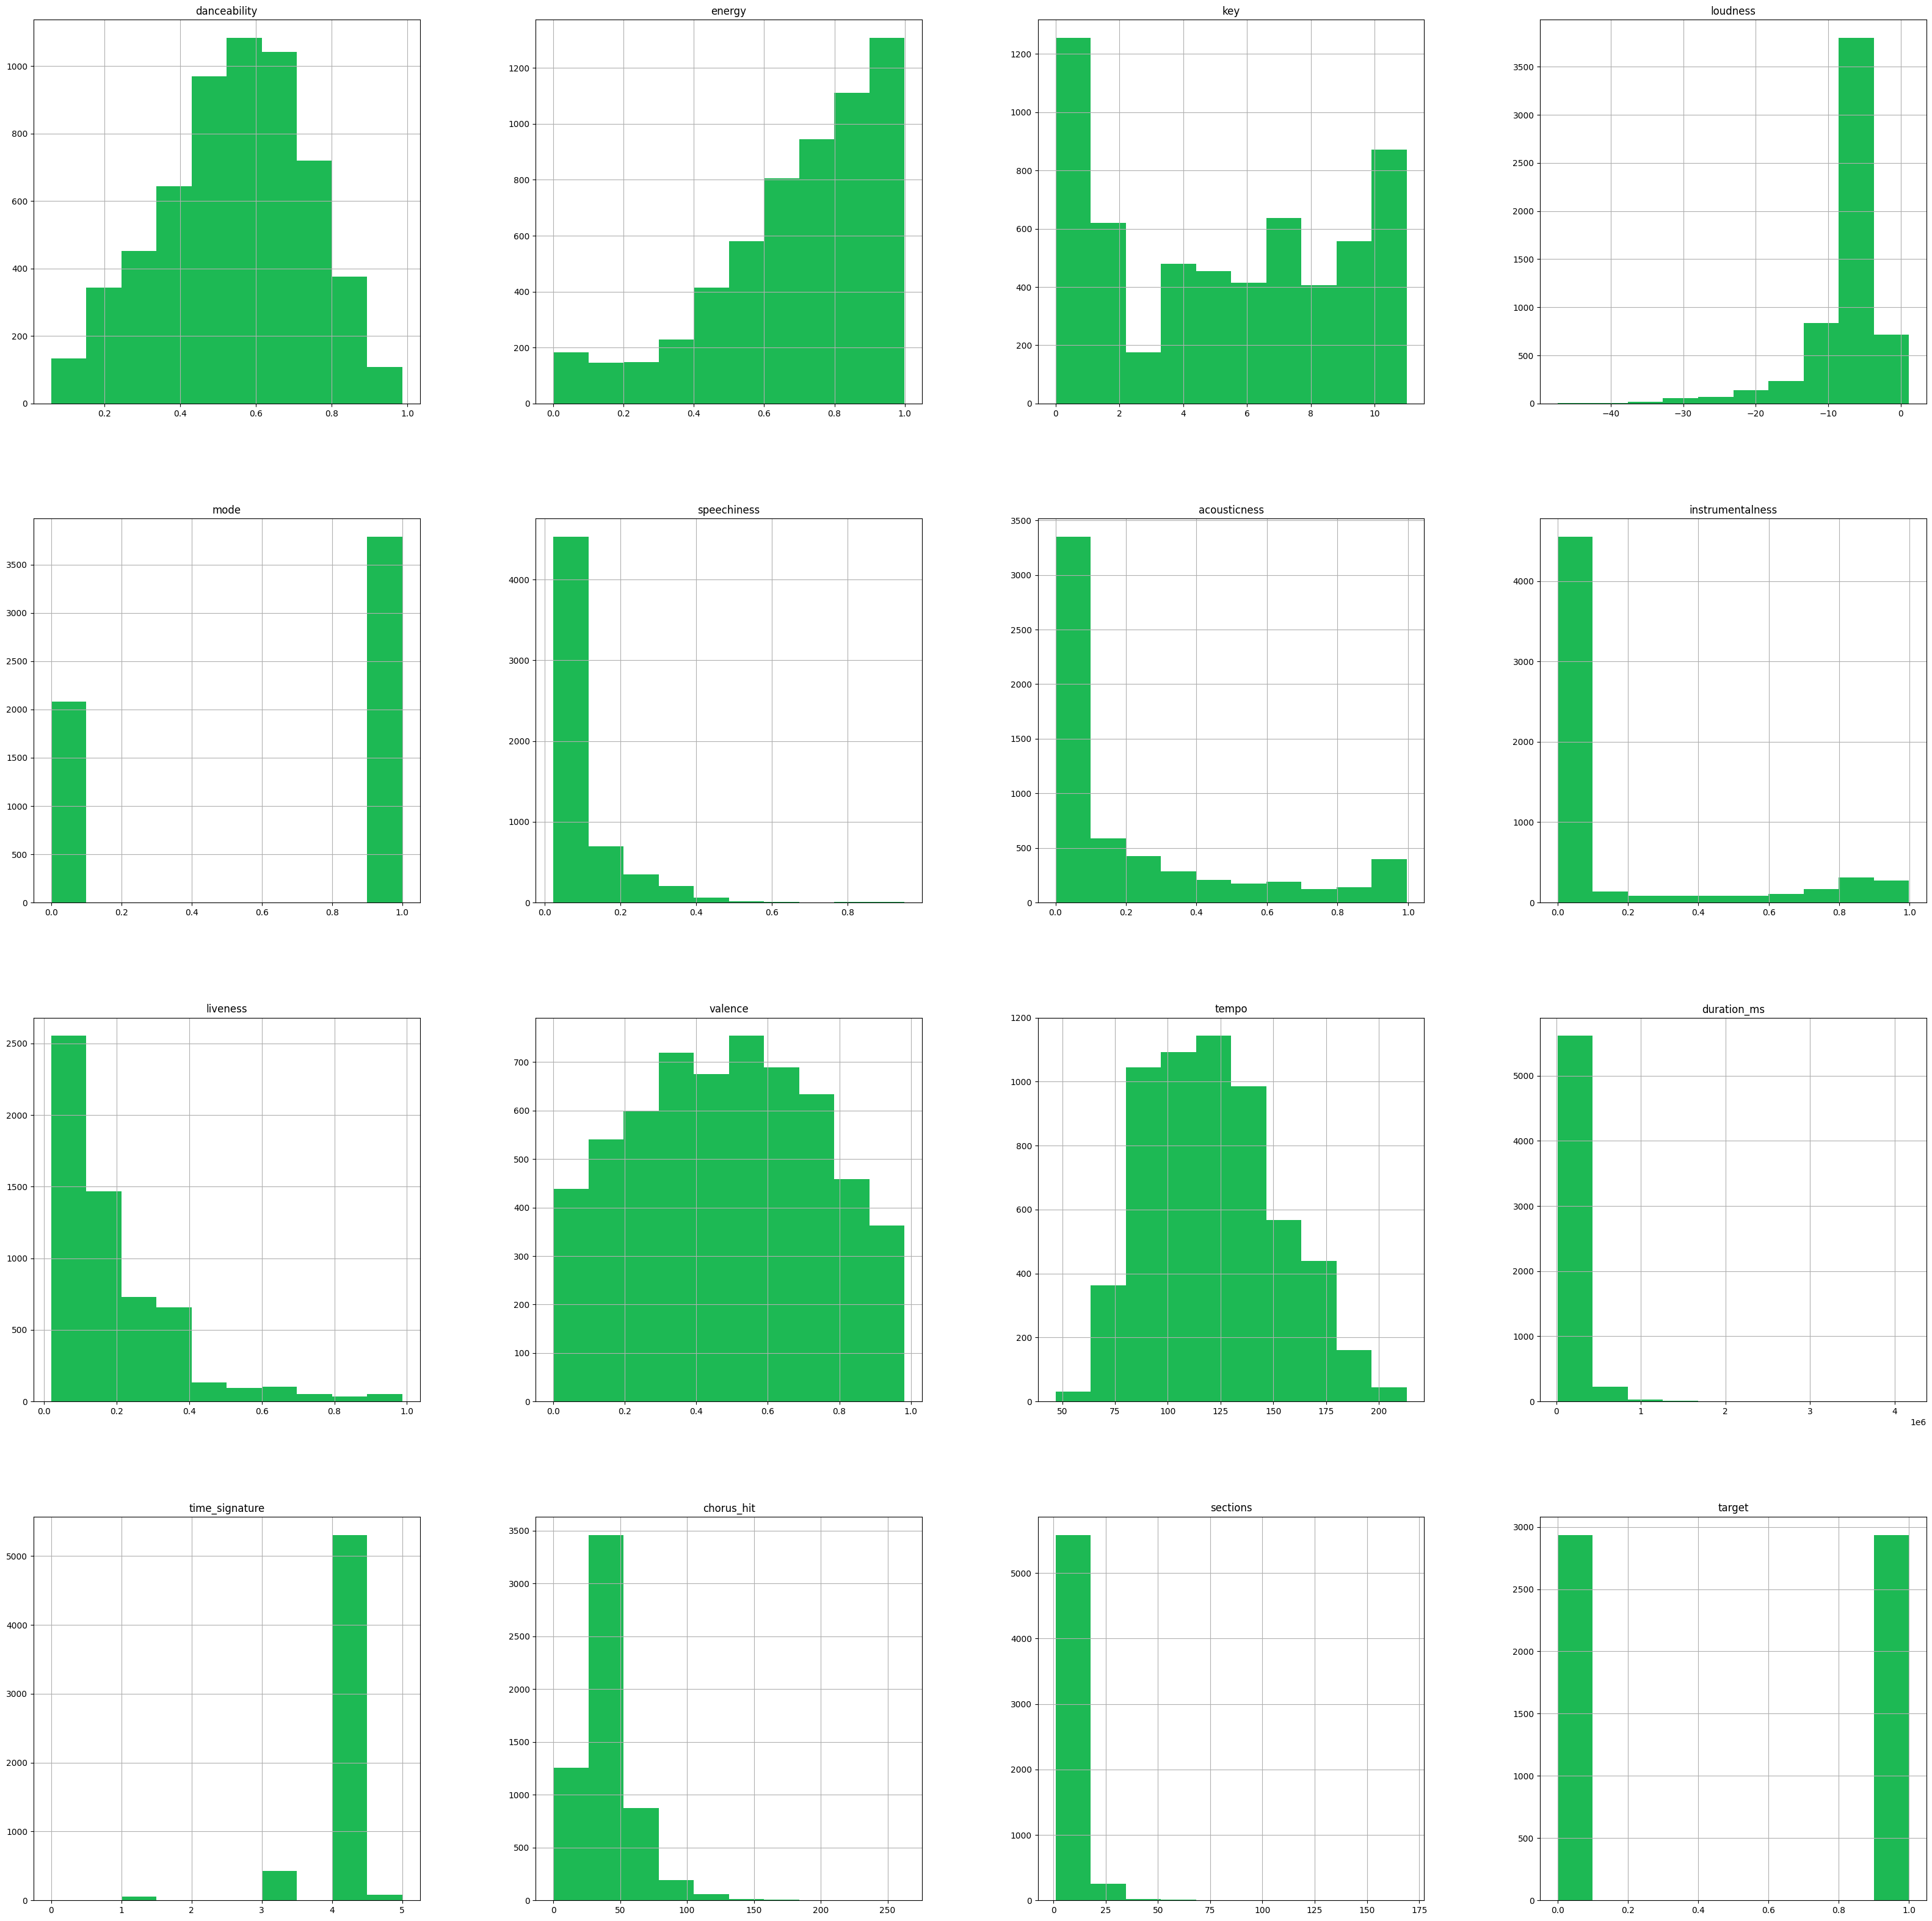

In [105]:
music.hist(bins=10,figsize=(40,40), color="#1DB954") #spotify's color code :)
plt.show()

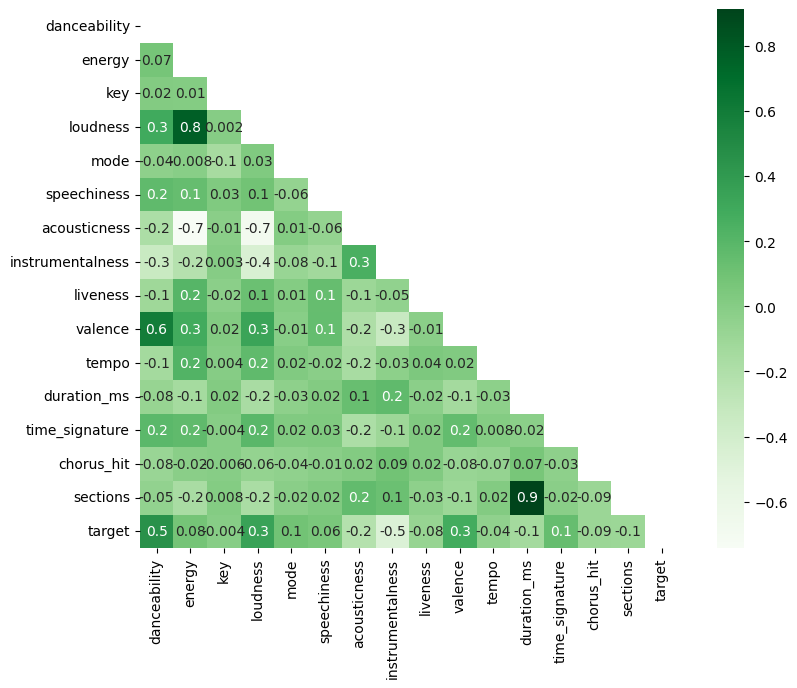

In [106]:
plt.figure(figsize=(10, 7))
mask = np.triu(music.corr()) 
sb.heatmap(music.corr(), cmap="Greens", annot=True, fmt='.1g',square =True, mask=mask);  

In [107]:
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

# RESEARCH QUESTIONS

In [108]:
#!pip3 install plotnine
from scipy.stats.stats import pearsonr
from scipy import stats
import plotnine as p9

### Research Question1: How does longer duration_ms effects tracks’ being hit ?

In [109]:
from scipy import stats

#H₀: data is normally distributed
#H₁: data is not normally distributed

def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    if p_value_normality <0.05:
        print("Normality Check - p value:", p_value_normality, "--> The data is not normally distributed")
    else:
        print("Normality Check - p value:", p_value_normality, "--> The data is normally distributed") 

In [110]:
#grouping based on duration_ms mean
music.loc[music["duration_ms"] <= music["duration_ms"].mean() , 'durationBin'] = 0
music.loc[music["duration_ms"] > music["duration_ms"].mean() , 'durationBin'] = 1

low_duration = music[["target", "duration_ms", "durationBin"]].loc[music["durationBin"] == 0]
high_duration = music[["target", "duration_ms", "durationBin"]].loc[music["durationBin"] == 1]

#check_normality(low_duration_ms["duration_ms"]) #boolean not normal
#check_normality(high_duration_ms["duration_ms"])


<i> H₀: Songs with longer duration have higher or equal virality rate than songs with shorter duration <p>
H₁: Songs with longer duration has lower virality rate than songs with shorter duration

In [111]:
ttest,pvalue = stats.mannwhitneyu(high_duration["target"], low_duration["target"], alternative="less") #duration:50456100, duration_ms:5795516925530589860656450288084
print("p-value:%.80f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.00000000000000000000000000000000000000000000000002897758462765294930328225144042
Reject null hypothesis


In [112]:
music = music.drop("durationBin", axis = 1)

### Research Question2: How significantly dancebility and song’s virality are correlated ? 

<i> H₀: Two features are independent. <p>
H₁: There is a dependency between two features.

In [113]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats

d = music["danceability"]
t = music["target"]
check_normality(d)
check_normality(t)

Normality Check - p value: 1.74377670282491e-21 --> The data is not normally distributed
Normality Check - p value: 0.0 --> The data is not normally distributed


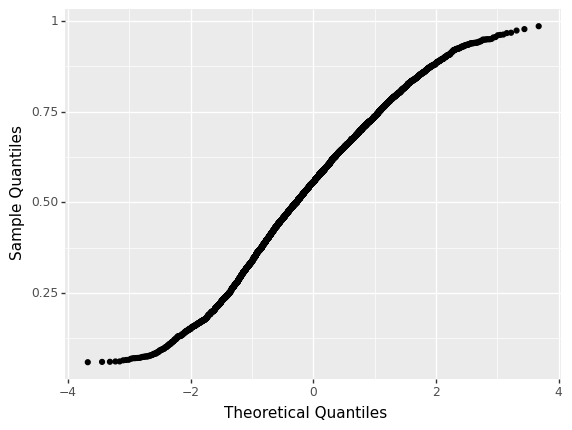

In [114]:
tq = stats.probplot(d, dist="norm")
df = pd.DataFrame(data = {'Theoretical Quantiles': tq[0][0], "Sample Quantiles": d.sort_values() })
print(p9.ggplot(df)+ p9.aes('Theoretical Quantiles', "Sample Quantiles") +p9.geom_point())

In [115]:
# calculate spearman's correlation
coef, p = spearmanr(d, t)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.20f' % p)

Spearmans correlation coefficient: 0.449
Samples are correlated (reject H0) p=0.00000000000000000000


In [116]:
#calculation correlation coefficient and p-value between x and y
[x,y] = pearsonr(d, t)
print("Pearson correlation coefficient: ", x)
print("Two-tailed p-value: ", y)

Pearson correlation coefficient:  0.4585497414167128
Two-tailed p-value:  2.878599521342971e-303


Since p=0, samples are correlated (reject H0) <p>
Though pearson and spearman may be close to one another, spearman is reliable in this case because the data is not normally distributed. A pearson correlation on non-normal data can also be used, but it's not going to be as relaible as a non-parametric test which does not assume normality.

### Research Question3: How does mode affect tracks’ being hit? 

In [117]:
m = music["mode"]
check_normality(m)
#grouping based on duration_ms mean
minor_music = music.loc[music["mode"] == 0]
major_music = music.loc[music["mode"] == 1]
mit= minor_music["target"]
mat= major_music["target"]


Normality Check - p value: 0.0 --> The data is not normally distributed


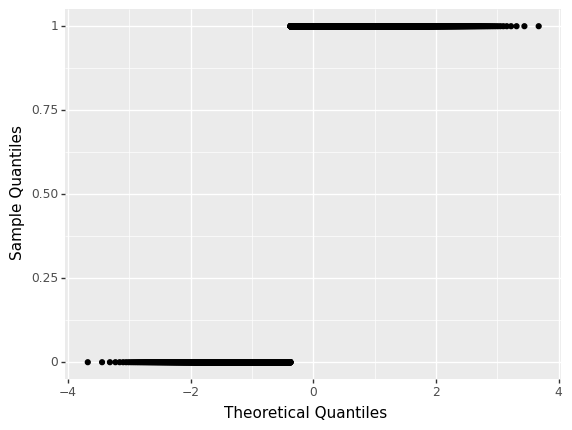

In [118]:
tq2 = stats.probplot(m, dist="norm")
df2 = pd.DataFrame(data = {'Theoretical Quantiles': tq2[0][0], "Sample Quantiles": m.sort_values() })
print(p9.ggplot(df2)+ p9.aes('Theoretical Quantiles', "Sample Quantiles") +p9.geom_point())

<b> Statistical Test <p> </b>
<i> H₀: The mean of songs with minor mode does not have significant difference than the mean of songs with major mode <p>
H₁: The mean of songs with minor mode has significant difference than the mean of songs with major mode

In [119]:
ttest,pvalue = stats.mannwhitneyu(mit,mat, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
    
avg_mat=mat.mean()
avg_mit=mit.mean()
if avg_mat > avg_mit:
    print("Songs with major modes are likely to be hit")
elif avg_mat > avg_mit:
    print("Songs with minor modes are likely to be hit")

p-value:0.0000
Reject null hypothesis
Songs with major modes are likely to be hit


At this significance level, it can be said that there is statistically significant difference between the average target of the two modes

### Research Question4: How does converting a continous scaled attribute into ordinal attribute effects the machine learning model performance ? 

In [120]:
#grouping based on speechiness thresholds 

music.loc[music["speechiness"] < 0.33 , 'speechinessBin2'] = 0 #almost entirely musical, non-speech-like
music.loc[(music["speechiness"] < 0.66) & (music["speechiness"] >=0.33), 'speechinessBin2'] = 1 # include both the music and speech
music.loc[music["speechiness"] >= 0.66 , 'speechinessBin2'] = 2 #almost entirely spoken word
music.insert(7, 'speechinessBin', music['speechinessBin2'].values)
music = music.drop("speechinessBin2", axis = 1)

In [121]:
music_original = music.drop("speechinessBin", axis = 1)
music_ordinal = music.drop("speechiness", axis = 1)

Statistical tests will be based on below null and alternate hyphoteses <p><p>

<i> H₀: The mean distribution of ordinal_data performances on specific algorithms is not statistically significantly different than that of original_data on the same algorithms. <p>
H₁: The mean distribution of ordinal_data performances on specific algorithms is statistically significantly different than that of ordinal_data on on the same algorithms.

# MACHINE LEARNING

In [122]:
pd.options.display.float_format = '{:,.6f}'.format

### Feature Selection, Extraction

In [123]:
#manipulating coloumn order
music_ordinal = music_ordinal.drop("target", axis = 1)
music_ordinal["target"] = music_original["target"]
#music_ordinal.head()

In [124]:
music_original = music_original.drop((["track","artist"]), axis = 1)
music_ordinal = music_ordinal.drop((["track","artist"]), axis = 1)
#music_ordinal.head()
#music_original.head()
#music_original.shape

In [125]:
music_dim_red = music_original.drop((["energy", "duration_ms"]), axis = 1) #reducing one of the highly correlated features

In [126]:
# split into test and train datasets
from sklearn.model_selection import train_test_split
# original data
X_org = music_original.iloc[:, :-1].values
y_org = music["target"].values
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_org, y_org, test_size=0.20, random_state=200)
# ordinal data (speechiness is turned to speechinessBin)
X_ord = music_ordinal.iloc[:, :-1].values
y_ord = music["target"].values
X_train_ord, X_test_ord, y_train_ord, y_test_ord = train_test_split(X_ord, y_ord, test_size=0.20, random_state=200)
# dimension reduced data (one of the highly correlated features is dropped to avoid overestimation)
X_dim_red = music_dim_red.iloc[:, :-1].values
y_dim_red = music["target"].values
X_train_dim_red, X_test_dim_red, y_train_dim_red, y_test_dim_red = train_test_split(X_dim_red, y_dim_red, test_size=0.20, random_state=200)

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_org = scaler.fit_transform(X_train_org) 
X_test_org = scaler.transform(X_test_org)
X_train_ord = scaler.fit_transform(X_train_ord) 
X_test_ord = scaler.transform(X_test_ord)
X_train_dim_red = scaler.fit_transform(X_train_dim_red)
X_test_dim_red = scaler.transform(X_test_dim_red)

# PCA

In [128]:
from sklearn.decomposition import PCA 
pca = PCA()
std_x_org = scaler.fit_transform(X_org) 
std_x_org = pd.DataFrame(std_x_org)
std_x_org.columns = music_original.columns[0:15]
pca.fit(std_x_org)
features_org = range(pca.n_components_)

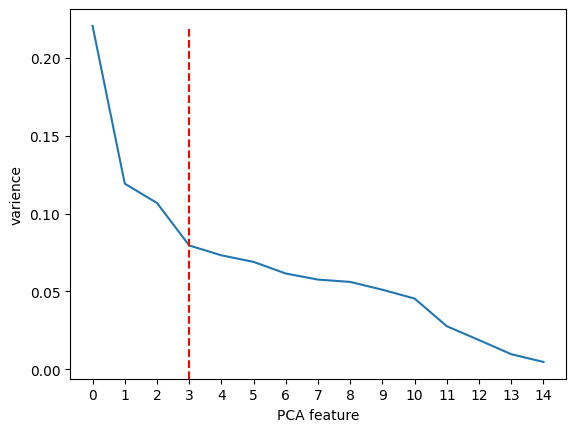

In [129]:
plt.plot(features_org,pca.explained_variance_ratio_)
plt.xticks(features_org)
plt.ylabel('varience')
plt.xlabel('PCA feature')
plt.axvline(x=3, ymax = 0.95, color='r', linestyle='--')
plt.show()

#4 principal component

In [130]:
pca_4 = PCA(n_components=4)
principal_components = pca_4.fit_transform(std_x_org)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
#final_df = pd.concat([principal_df, music_original["target"]], axis = 1)

In [131]:
principal_x_train, principal_x_test, principal_y_train, principal_y_test = train_test_split(principal_df,music_original["target"],test_size = 0.2, random_state = 2000)
principal_x_train = scaler.fit_transform(principal_x_train) 
principal_x_test = scaler.transform(principal_x_test)

## Baseline Model

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
models = []
stdevs = []
params = []

In [133]:
baseline = KNeighborsClassifier(78) #suggested number of neighbors (sqrt of instances), other parameters as default.
baseline.fit(X_train_org, y_train_org)
y_pred_baseline = baseline.predict(X_test_org)
kf = KFold(n_splits =10,  shuffle = True, random_state = 2000)
#kf = StratifiedKFold(n_splits = 5,  shuffle = False, random_state = 2000)
cv_results_baseline = cross_val_score(baseline, X_train_org, y_train_org, cv = kf)
models.append('KNN_baseline: n_neighbors:78, others: default')
stdevs.append(np.std(cv_results_baseline))
print('CV results_baseline:', cv_results_baseline)
print('CV score_baseline: %.4f +/- %.4f' % (np.mean(cv_results_baseline), np.std(cv_results_baseline))) 

CV results_baseline: [0.7787234  0.75957447 0.74893617 0.79574468 0.74893617 0.84255319
 0.80638298 0.80810235 0.77398721 0.77185501]
CV score_baseline: 0.7835 +/- 0.0282


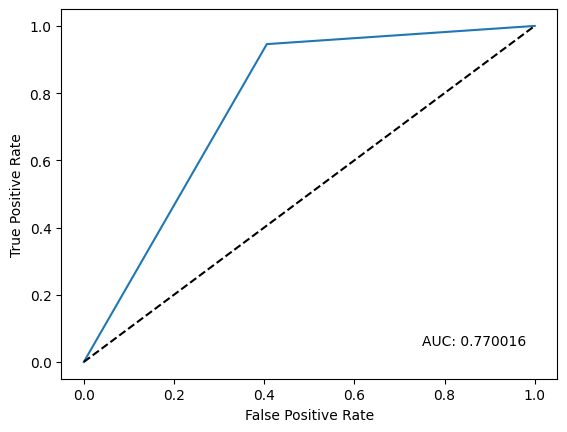

In [134]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_org, y_pred_baseline)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
auc = roc_auc_score(y_test_org, y_pred_baseline)
textstr = 'AUC: ' + str(np.round(auc,6))
plt.text(0.75, 0.05, textstr, fontsize=10)
plt.show()

## KNN

#### original data
##### with speechiness

 KNN can be used for multiclass classification

In [135]:
param_grid = {'n_neighbors': [i for i in range(77,2499,2)],
     'weights': ['uniform', 'distance'],
     'metric': ['euclidean','manhattan']
    }

rand_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv = 10, verbose = 1, random_state=2000 , scoring = "accuracy", n_jobs = -1)

rand_search.fit(X_train_org, y_train_org)
print(rand_search.best_params_)
print(rand_search.best_estimator_)
print(rand_search.best_score_)

results_knn_org = pd.DataFrame(rand_search.cv_results_)[['params','mean_test_score','rank_test_score']]
pd.set_option('display.max_colwidth', None)
results_knn_org.sort_values('rank_test_score')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be e

{'weights': 'uniform', 'n_neighbors': 187, 'metric': 'manhattan'}
KNeighborsClassifier(metric='manhattan', n_neighbors=187)
0.7719856643832509


,params,mean_test_score,rank_test_score
8,"{'weights': 'uniform', 'n_neighbors': 187, 'metric': 'manhattan'}",0.771986,1
7,"{'weights': 'distance', 'n_neighbors': 259, 'metric': 'euclidean'}",0.758362,2
0,"{'weights': 'uniform', 'n_neighbors': 653, 'metric': 'manhattan'}",0.710238,3
9,"{'weights': 'distance', 'n_neighbors': 1253, 'metric': 'manhattan'}",0.684478,4
1,"{'weights': 'distance', 'n_neighbors': 1699, 'metric': 'manhattan'}",0.655095,5
5,"{'weights': 'uniform', 'n_neighbors': 1513, 'metric': 'euclidean'}",0.649780,6
6,"{'weights': 'uniform', 'n_neighbors': 1417, 'metric': 'manhattan'}",0.649561,7
2,"{'weights': 'uniform', 'n_neighbors': 1667, 'metric': 'euclidean'}",0.638920,8
4,"{'weights': 'uniform', 'n_neighbors': 2035, 'metric': 'manhattan'}",0.615287,9
3,"{'weights': 'uniform', 'n_neighbors': 2097, 'metric': 'euclidean'}",0.611454,10


In [136]:
knn_org = KNeighborsClassifier(187, weights = "uniform", p = 1) 
knn_org.fit(X_train_org, y_train_org)
params.append(knn_org.get_params)
y_pred_knn_org = knn_org.predict(X_test_org)
#kf = StratifiedKFold(n_splits = 5,  shuffle = False, random_state = 2000)
cv_results_knn_org = cross_val_score(knn_org, X_train_org, y_train_org, cv = kf)
models.append('KNN_org: n_neighbors:187, weights:"uniform", distance:"Manhattan", others: default')
stdevs.append(np.std(cv_results_knn_org))
print('CV results_knn_org:', cv_results_knn_org)
print('CV score_knn_org: %.4f +/- %.4f' % (np.mean(cv_results_knn_org), np.std(cv_results_knn_org))) 

CV results_knn_org: [0.76595745 0.74255319 0.72553191 0.78510638 0.75106383 0.83404255
 0.8        0.79744136 0.75266525 0.76119403]
CV score_knn_org: 0.7716 +/- 0.0307


In [137]:
print(classification_report(y_test_org, y_pred_knn_org))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67       584
           1       0.67      0.97      0.79       591

    accuracy                           0.75      1175
   macro avg       0.81      0.74      0.73      1175
weighted avg       0.80      0.75      0.73      1175



#### ordinal data
##### with speechinessBin

In [138]:
param_grid = {'n_neighbors': [i for i in range(77,2499,2)],
#[500,1000,2500], #binary classification 100,150,200,
     'weights': ['uniform', 'distance'],
     'metric': ['euclidean','manhattan']
    }

rand_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv = 10, verbose = 1, random_state=2000 , scoring = "accuracy", n_jobs = -1)

rand_search.fit(X_train_ord, y_train_ord)
print(rand_search.best_params_)
print(rand_search.best_estimator_)
print(rand_search.best_score_)

results_knn_ord = pd.DataFrame(rand_search.cv_results_)[['params','mean_test_score','rank_test_score']]
pd.set_option('display.max_colwidth', None)
results_knn_ord.sort_values('rank_test_score')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be e

{'weights': 'uniform', 'n_neighbors': 187, 'metric': 'manhattan'}
KNeighborsClassifier(metric='manhattan', n_neighbors=187)
0.7653862904323369


,params,mean_test_score,rank_test_score
8,"{'weights': 'uniform', 'n_neighbors': 187, 'metric': 'manhattan'}",0.765386,1
7,"{'weights': 'distance', 'n_neighbors': 259, 'metric': 'euclidean'}",0.754317,2
0,"{'weights': 'uniform', 'n_neighbors': 653, 'metric': 'manhattan'}",0.706197,3
9,"{'weights': 'distance', 'n_neighbors': 1253, 'metric': 'manhattan'}",0.675963,4
1,"{'weights': 'distance', 'n_neighbors': 1699, 'metric': 'manhattan'}",0.647647,5
5,"{'weights': 'uniform', 'n_neighbors': 1513, 'metric': 'euclidean'}",0.646374,6
6,"{'weights': 'uniform', 'n_neighbors': 1417, 'metric': 'manhattan'}",0.644241,7
2,"{'weights': 'uniform', 'n_neighbors': 1667, 'metric': 'euclidean'}",0.632746,8
4,"{'weights': 'uniform', 'n_neighbors': 2035, 'metric': 'manhattan'}",0.610177,9
3,"{'weights': 'uniform', 'n_neighbors': 2097, 'metric': 'euclidean'}",0.605917,10


In [139]:
knn_ord = KNeighborsClassifier(187, weights = "uniform", p = 1) 
knn_ord.fit(X_train_ord, y_train_ord)
params.append(knn_ord.get_params)
y_pred_knn_ord = knn_ord.predict(X_test_ord)
#kf = StratifiedKFold(n_splits = 5,  shuffle = False, random_state = 2000)
cv_results_knn_ord = cross_val_score(knn_ord, X_train_ord, y_train_ord, cv = kf)
models.append('KNN_ord: n_neighbors:187, weights:"uniform", distance:"Manhattan", others: default')
stdevs.append(np.std(cv_results_knn_ord))
print('CV results_knn_ord:', cv_results_knn_ord)
print('CV score_knn_ord: %.4f +/- %.4f' % (np.mean(cv_results_knn_ord), np.std(cv_results_knn_ord))) 

CV results_knn_ord: [0.75744681 0.74042553 0.7212766  0.77659574 0.74468085 0.81702128
 0.80212766 0.79104478 0.74413646 0.75266525]
CV score_knn_ord: 0.7647 +/- 0.0291


In [140]:
print(classification_report(y_test_ord, y_pred_knn_ord))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67       584
           1       0.67      0.96      0.79       591

    accuracy                           0.74      1175
   macro avg       0.80      0.74      0.73      1175
weighted avg       0.80      0.74      0.73      1175



with ordinal speechinessBin, altough performance on validation decreases slightly, performance on test data increases, again slightly

#### dimension reduced data

In [141]:
param_grid = {'n_neighbors': [i for i in range(77,2499,2)],
#[500,1000,2500], #binary classification 100,150,200,
     'weights': ['uniform', 'distance'],
     'metric': ['euclidean','manhattan']
    }

rand_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv = 10, verbose = 1, random_state=2000 , scoring = "accuracy", n_jobs = -1)

rand_search.fit(X_train_dim_red, y_train_dim_red)
print(rand_search.best_params_)
print(rand_search.best_estimator_)
print(rand_search.best_score_)

results_knn_dim_red = pd.DataFrame(rand_search.cv_results_)[['params','mean_test_score','rank_test_score']]
pd.set_option('display.max_colwidth', None)
results_knn_dim_red.sort_values('rank_test_score')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be e

{'weights': 'uniform', 'n_neighbors': 187, 'metric': 'manhattan'}
KNeighborsClassifier(metric='manhattan', n_neighbors=187)
0.7553803928684844


,params,mean_test_score,rank_test_score
8,"{'weights': 'uniform', 'n_neighbors': 187, 'metric': 'manhattan'}",0.755380,1
7,"{'weights': 'distance', 'n_neighbors': 259, 'metric': 'euclidean'}",0.753464,2
0,"{'weights': 'uniform', 'n_neighbors': 653, 'metric': 'manhattan'}",0.709811,3
9,"{'weights': 'distance', 'n_neighbors': 1253, 'metric': 'manhattan'}",0.682560,4
5,"{'weights': 'uniform', 'n_neighbors': 1513, 'metric': 'euclidean'}",0.660849,5
1,"{'weights': 'distance', 'n_neighbors': 1699, 'metric': 'manhattan'}",0.659996,6
6,"{'weights': 'uniform', 'n_neighbors': 1417, 'metric': 'manhattan'}",0.656589,7
2,"{'weights': 'uniform', 'n_neighbors': 1667, 'metric': 'euclidean'}",0.651695,8
3,"{'weights': 'uniform', 'n_neighbors': 2097, 'metric': 'euclidean'}",0.631895,9
4,"{'weights': 'uniform', 'n_neighbors': 2035, 'metric': 'manhattan'}",0.630827,10


In [142]:
knn_dim_red = KNeighborsClassifier(187, weights = "uniform", p = 1) 
knn_dim_red.fit(X_train_dim_red, y_train_dim_red)
y_pred_knn_dim_red = knn_dim_red.predict(X_test_dim_red)
params.append(knn_dim_red.get_params)
#kf = StratifiedKFold(n_splits = 5,  shuffle = False, random_state = 2000)
cv_results_knn_dim_red = cross_val_score(knn_dim_red, X_train_dim_red, y_train_dim_red, cv = kf)
models.append('KNN_dim_red: n_neighbors:187, weights:"uniform", distance:"Manhattan", others: default')
stdevs.append(np.std(cv_results_knn_dim_red))
print('CV results_knn_dim_red:', cv_results_knn_dim_red)
print('CV score_knn_dim_red: %.4f +/- %.4f' % (np.mean(cv_results_knn_dim_red), np.std(cv_results_knn_dim_red))) 

CV results_knn_dim_red: [0.75319149 0.73191489 0.72340426 0.77446809 0.72765957 0.8
 0.79574468 0.7803838  0.73347548 0.75692964]
CV score_knn_dim_red: 0.7577 +/- 0.0272


In [143]:
print(classification_report(y_test_dim_red, y_pred_knn_dim_red))

              precision    recall  f1-score   support

           0       0.95      0.51      0.66       584
           1       0.67      0.97      0.79       591

    accuracy                           0.74      1175
   macro avg       0.81      0.74      0.73      1175
weighted avg       0.81      0.74      0.73      1175



dimension reduction doesnt result in significant improvement, so it won't be run with upcoming algorithms

#### pca data

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_neighbors': [i for i in range(77,2499,2)],
#[500,1000,2500], #binary classification 100,150,200,
#choosing k so small like 100 and lower would be overfitting compared to number of datapoints 5600. so n_neigbors intervals have minimum 500 whic yields more stable, generizable model 
     'weights': ['uniform', 'distance'],
     'metric': ['euclidean','manhattan']
    }

rand_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv = 10, verbose = 1, random_state=2000 , scoring = "accuracy", n_jobs = -1)

rand_search.fit(principal_x_train, principal_y_train)
print(rand_search.best_params_)
print(rand_search.best_estimator_)
print(rand_search.best_score_)

results_knn_pca_org = pd.DataFrame(rand_search.cv_results_)[['params','mean_test_score','rank_test_score']]
pd.set_option('display.max_colwidth', None)
results_knn_pca_org.sort_values('rank_test_score')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be e

{'weights': 'distance', 'n_neighbors': 259, 'metric': 'euclidean'}
KNeighborsClassifier(metric='euclidean', n_neighbors=259, weights='distance')
0.7596302681123259


,params,mean_test_score,rank_test_score
7,"{'weights': 'distance', 'n_neighbors': 259, 'metric': 'euclidean'}",0.759630,1
8,"{'weights': 'uniform', 'n_neighbors': 187, 'metric': 'manhattan'}",0.758142,2
0,"{'weights': 'uniform', 'n_neighbors': 653, 'metric': 'manhattan'}",0.736856,3
9,"{'weights': 'distance', 'n_neighbors': 1253, 'metric': 'manhattan'}",0.727274,4
1,"{'weights': 'distance', 'n_neighbors': 1699, 'metric': 'manhattan'}",0.711733,5
5,"{'weights': 'uniform', 'n_neighbors': 1513, 'metric': 'euclidean'}",0.711095,6
2,"{'weights': 'uniform', 'n_neighbors': 1667, 'metric': 'euclidean'}",0.703001,7
6,"{'weights': 'uniform', 'n_neighbors': 1417, 'metric': 'manhattan'}",0.702364,8
3,"{'weights': 'uniform', 'n_neighbors': 2097, 'metric': 'euclidean'}",0.690650,9
4,"{'weights': 'uniform', 'n_neighbors': 2035, 'metric': 'manhattan'}",0.673622,10


In [145]:
knn_pca_org = KNeighborsClassifier(187, weights = "uniform", p = 1) 
knn_pca_org.fit(principal_x_train, principal_y_train)
y_pred_knn_pca_org = knn_pca_org.predict(principal_x_test)
params.append(knn_pca_org.get_params)
#kf = StratifiedKFold(n_splits = 5,  shuffle = False, random_state = 2000)
cv_results_knn_pca_org = cross_val_score(knn_pca_org, principal_x_train, principal_y_train, cv = kf)
models.append('KNN_pca: n_neighbors:187, weights:"uniform", distance:"Manhattan", others: default')
stdevs.append(np.std(cv_results_knn_pca_org))
print('CV results_knn_pca_org:', cv_results_knn_pca_org)
print('CV score_knn_pca_org: %.4f +/- %.4f' % (np.mean(cv_results_knn_pca_org), np.std(cv_results_knn_pca_org))) 

CV results_knn_pca_org: [0.75531915 0.77659574 0.74042553 0.73829787 0.76382979 0.74255319
 0.77234043 0.75692964 0.7782516  0.76332623]
CV score_knn_pca_org: 0.7588 +/- 0.0140


In [146]:
print(classification_report(principal_y_test, y_pred_knn_pca_org))

              precision    recall  f1-score   support

           0       0.85      0.60      0.70       596
           1       0.68      0.89      0.77       579

    accuracy                           0.74      1175
   macro avg       0.76      0.74      0.73      1175
weighted avg       0.76      0.74      0.73      1175



<Figure size 2000x1600 with 0 Axes>

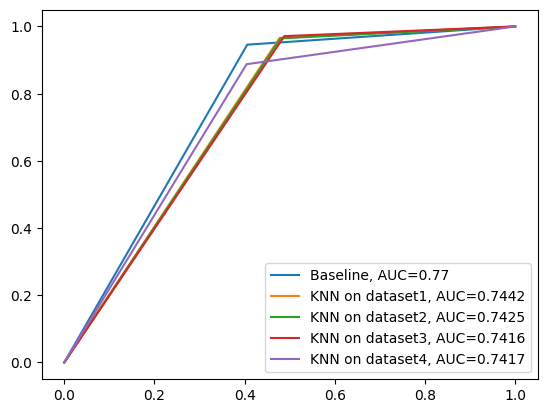

In [147]:
plt.figure(figsize=(20, 16))
plt.figure(0).clf()

fpr, tpr, _ = roc_curve(y_test_org, y_pred_baseline)
auc = round(roc_auc_score(y_test_org, y_pred_baseline), 4)
plt.plot(fpr,tpr,label="Baseline, AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test_org, y_pred_knn_org)
auc = round(roc_auc_score(y_test_org, y_pred_knn_org), 4)
plt.plot(fpr,tpr,label="KNN on dataset1, AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test_ord, y_pred_knn_ord)
auc = round(roc_auc_score(y_test_ord, y_pred_knn_ord), 4)
plt.plot(fpr,tpr,label="KNN on dataset2, AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test_dim_red, y_pred_knn_dim_red)
auc = round(roc_auc_score(y_test_dim_red, y_pred_knn_dim_red), 4)
plt.plot(fpr,tpr,label="KNN on dataset3, AUC="+str(auc))

fpr, tpr, _ = roc_curve(principal_y_test, y_pred_knn_pca_org)
auc = round(roc_auc_score(principal_y_test, y_pred_knn_pca_org), 4)
plt.plot(fpr,tpr,label="KNN on dataset4, AUC="+str(auc))

#add legend
plt.legend()

## RANDOM FOREST   

#### original data
##### with speechiness

In [148]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [i for i in range(100,1000,100)], 'max_features': ["sqrt"], 'max_depth': [i for i in range(5,15,1)], 'random_state' : [2000]}

rand_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = 5, random_state = 2000, verbose = 1, scoring = "accuracy", n_jobs = -1)
rand_search.fit(X_train_org, y_train_org)
print(rand_search.best_params_)
print(rand_search.best_estimator_)
print(rand_search.best_score_)

results_rf = pd.DataFrame(rand_search.cv_results_)[['params','mean_test_score','rank_test_score']]
pd.set_option('display.max_colwidth', None)
results_rf.sort_values('rank_test_score')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'random_state': 2000, 'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 14}
RandomForestClassifier(max_depth=14, max_features='sqrt', n_estimators=600,
                       random_state=2000)
0.8556547254888631


,params,mean_test_score,rank_test_score
0,"{'random_state': 2000, 'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 14}",0.855655,1
9,"{'random_state': 2000, 'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 10}",0.853526,2
4,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 12}",0.853314,3
8,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 11}",0.852889,4
5,"{'random_state': 2000, 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 12}",0.851610,5
3,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 8}",0.848629,6
1,"{'random_state': 2000, 'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 8}",0.847565,7
7,"{'random_state': 2000, 'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 8}",0.847353,8
6,"{'random_state': 2000, 'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 7}",0.846074,9
2,"{'random_state': 2000, 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 7}",0.843733,10


In [149]:
random_forest_org = RandomForestClassifier(n_estimators=600, max_features='sqrt', max_depth=14, random_state = 2000)
params.append(random_forest_org.get_params)
random_forest_org.fit(X_train_org, y_train_org)
y_pred_rf_org = random_forest_org.predict(X_test_org)
cv_results_rf_org = cross_val_score(random_forest_org, X_train_org, y_train_org, cv=kf)
models.append('RandomForest_org: n_estimators:600, max_features:"sqrt", max_depth:14, random_state:2000')
stdevs.append(np.std(cv_results_rf_org))
print('CV results_rf_org:', cv_results_rf_org)
print('CV score: %.4f +/- %.4f' % (np.mean(cv_results_rf_org), np.std(cv_results_rf_org))) 

CV results_rf_org: [0.83404255 0.83829787 0.85957447 0.85106383 0.84468085 0.8893617
 0.84042553 0.88272921 0.84648188 0.86140725]
CV score: 0.8548 +/- 0.0177


In [150]:
print(classification_report(y_test_org, y_pred_rf_org))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       584
           1       0.83      0.90      0.86       591

    accuracy                           0.85      1175
   macro avg       0.86      0.85      0.85      1175
weighted avg       0.86      0.85      0.85      1175



#### ordinal data
##### with speechinessBin

In [151]:
param_grid = {'n_estimators': [i for i in range(100,1000,100)], 'max_features': ["sqrt"], 'max_depth': [i for i in range(5,15,1)], 'random_state' : [2000]}

rand_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = 5, random_state = 2000, verbose = 1, scoring = "accuracy", n_jobs = -1)
rand_search.fit(X_train_ord, y_train_ord)
print(rand_search.best_params_)
print(rand_search.best_estimator_)
print(rand_search.best_score_)

results_rf_ord = pd.DataFrame(rand_search.cv_results_)[['params','mean_test_score','rank_test_score']]
pd.set_option('display.max_colwidth', None)
results_rf_ord.sort_values('rank_test_score')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 12}
RandomForestClassifier(max_depth=12, max_features='sqrt', n_estimators=700,
                       random_state=2000)
0.8554426392948586


,params,mean_test_score,rank_test_score
4,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 12}",0.855443,1
0,"{'random_state': 2000, 'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 14}",0.853953,2
9,"{'random_state': 2000, 'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 10}",0.852037,3
8,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 11}",0.851398,4
5,"{'random_state': 2000, 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 12}",0.850333,5
7,"{'random_state': 2000, 'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 8}",0.848418,6
1,"{'random_state': 2000, 'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 8}",0.848205,7
3,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 8}",0.846501,8
2,"{'random_state': 2000, 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 7}",0.846075,9
6,"{'random_state': 2000, 'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 7}",0.845223,10


In [152]:
random_forest_ord = RandomForestClassifier(n_estimators=700, max_features='sqrt', max_depth=12, random_state = 2000)
random_forest_ord.fit(X_train_ord, y_train_ord)
params.append(random_forest_ord.get_params)
y_pred_rf_ord = random_forest_org.predict(X_test_ord)
cv_results_rf_ord = cross_val_score(random_forest_ord, X_train_ord, y_train_ord, cv=kf)
models.append('RandomForest_ord: n_estimators:700, max_features:"sqrt", max_depth:12, random_state:2000')
stdevs.append(np.std(cv_results_rf_ord))
print('CV results_rf_ord:', cv_results_rf_ord)
print('CV score: %.4f +/- %.4f' % (np.mean(cv_results_rf_ord), np.std(cv_results_rf_ord))) 

CV results_rf_ord: [0.83404255 0.83617021 0.85957447 0.84680851 0.83829787 0.88723404
 0.84255319 0.891258   0.84434968 0.86353945]
CV score: 0.8544 +/- 0.0196


In [153]:
print(classification_report(y_test_ord, y_pred_rf_ord))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       584
           1       0.83      0.87      0.85       591

    accuracy                           0.85      1175
   macro avg       0.85      0.85      0.85      1175
weighted avg       0.85      0.85      0.85      1175



slight decrease with binning

#### dimension reduced data

In [154]:
param_grid = {'n_estimators': [i for i in range(100,1000,100)], 'max_features': ["sqrt"], 'max_depth': [i for i in range(5,15,1)], 'random_state' : [2000]}

rand_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = 5, random_state = 2000, verbose = 1, scoring = "accuracy", n_jobs = -1)
rand_search.fit(X_train_dim_red, y_train_dim_red)
print(rand_search.best_params_)
print(rand_search.best_estimator_)
print(rand_search.best_score_)

results_rf_dim_red = pd.DataFrame(rand_search.cv_results_)[['params','mean_test_score','rank_test_score']]
pd.set_option('display.max_colwidth', None)
results_rf_dim_red.sort_values('rank_test_score')



Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'random_state': 2000, 'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 14}
RandomForestClassifier(max_depth=14, max_features='sqrt', n_estimators=600,
                       random_state=2000)
0.8428808374685609


,params,mean_test_score,rank_test_score
0,"{'random_state': 2000, 'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 14}",0.842881,1
4,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 12}",0.842455,2
9,"{'random_state': 2000, 'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 10}",0.841817,3
8,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 11}",0.840540,4
5,"{'random_state': 2000, 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 12}",0.840538,5
1,"{'random_state': 2000, 'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 8}",0.839902,6
3,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 8}",0.839049,7
7,"{'random_state': 2000, 'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 8}",0.837348,8
2,"{'random_state': 2000, 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 7}",0.836710,9
6,"{'random_state': 2000, 'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 7}",0.836709,10


In [155]:
random_forest_dim_red = RandomForestClassifier(n_estimators=600, max_features='sqrt', max_depth=14, random_state = 2000)
random_forest_dim_red.fit(X_train_dim_red, y_train_dim_red)
y_pred_rf_dim_red = random_forest_dim_red.predict(X_test_dim_red)
params.append(random_forest_dim_red.get_params)
cv_results_rf_dim_red = cross_val_score(random_forest_dim_red, X_train_dim_red, y_train_dim_red, cv=kf)
models.append('RandomForest_dim_red: n_estimators:600, max_features:"sqrt", max_depth:14, random_state:2000')
stdevs.append(np.std(cv_results_rf_dim_red))
print('CV results_rf_dim_red:', cv_results_rf_dim_red)
print('CV score: %.4f +/- %.4f' % (np.mean(cv_results_rf_dim_red), np.std(cv_results_rf_dim_red))) 

CV results_rf_dim_red: [0.82765957 0.8212766  0.83404255 0.83617021 0.81702128 0.88085106
 0.84042553 0.87420043 0.83795309 0.84434968]
CV score: 0.8414 +/- 0.0198


#### pca data

In [156]:
param_grid = {'n_estimators': [i for i in range(100,1000,100)], 'max_features': ["sqrt"], 'max_depth': [i for i in range(5,15,1)], 'random_state' : [2000]}

rand_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = 5, random_state = 2000, verbose = 1, scoring = "accuracy", n_jobs = -1)
rand_search.fit(principal_x_train, principal_y_train)
print(rand_search.best_params_)
print(rand_search.best_estimator_)
print(rand_search.best_score_)

results_rf_pca_org = pd.DataFrame(rand_search.cv_results_)[['params','mean_test_score','rank_test_score']]
pd.set_option('display.max_colwidth', None)
results_rf_pca_org.sort_values('rank_test_score')



Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'random_state': 2000, 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 7}
RandomForestClassifier(max_depth=7, max_features='sqrt', random_state=2000)
0.7726238868873632


,params,mean_test_score,rank_test_score
2,"{'random_state': 2000, 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 7}",0.772624,1
6,"{'random_state': 2000, 'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 7}",0.772197,2
1,"{'random_state': 2000, 'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 8}",0.772197,3
8,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 11}",0.771773,4
7,"{'random_state': 2000, 'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 8}",0.771772,5
3,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 8}",0.771559,6
9,"{'random_state': 2000, 'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 10}",0.771347,7
0,"{'random_state': 2000, 'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 14}",0.770707,8
4,"{'random_state': 2000, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 12}",0.770707,9
5,"{'random_state': 2000, 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 12}",0.767728,10


In [157]:
random_forest_pca_org = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=7, random_state = 2000)
random_forest_pca_org.fit(principal_x_train, principal_y_train)
params.append(random_forest_pca_org.get_params)
y_pred_rf_pca_org = random_forest_pca_org.predict(principal_x_test)
cv_results_rf_pca_org = cross_val_score(random_forest_pca_org, principal_x_train, principal_y_train, cv=kf)
models.append('RandomForest_pca: n_estimators:100, max_features:"sqrt", max_depth:7, random_state:2000')
stdevs.append(np.std(cv_results_rf_pca_org))
print('CV results_rf_pca_org:', cv_results_rf_pca_org)
print('CV score: %.4f +/- %.4f' % (np.mean(cv_results_rf_pca_org), np.std(cv_results_rf_pca_org))) 

CV results_rf_pca_org: [0.76808511 0.78723404 0.75957447 0.76595745 0.7787234  0.76382979
 0.78510638 0.76972281 0.80170576 0.78251599]
CV score: 0.7762 +/- 0.0124


In [158]:
print(classification_report(principal_y_test, y_pred_rf_pca_org))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       596
           1       0.73      0.83      0.78       579

    accuracy                           0.77      1175
   macro avg       0.77      0.77      0.76      1175
weighted avg       0.77      0.77      0.76      1175



<Figure size 2000x1600 with 0 Axes>

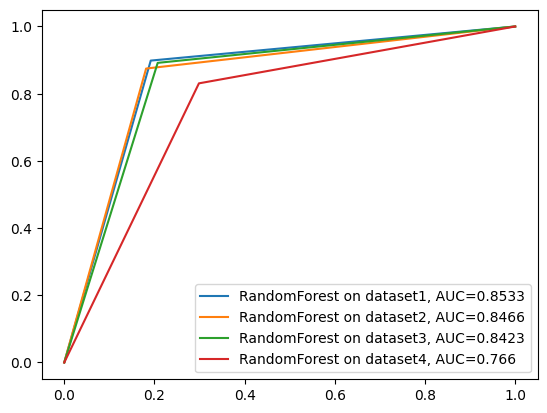

In [159]:
plt.figure(figsize=(20, 16))
plt.figure(0).clf()

fpr, tpr, _ = roc_curve(y_test_org, y_pred_rf_org)
auc = round(roc_auc_score(y_test_org, y_pred_rf_org), 4)
plt.plot(fpr,tpr,label="RandomForest on dataset1, AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test_ord, y_pred_rf_ord)
auc = round(roc_auc_score(y_test_ord, y_pred_rf_ord), 4)
plt.plot(fpr,tpr,label="RandomForest on dataset2, AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test_dim_red, y_pred_rf_dim_red)
auc = round(roc_auc_score(y_test_dim_red, y_pred_rf_dim_red), 4)
plt.plot(fpr,tpr,label="RandomForest on dataset3, AUC="+str(auc))

fpr, tpr, _ = roc_curve(principal_y_test, y_pred_rf_pca_org)
auc = round(roc_auc_score(principal_y_test, y_pred_rf_pca_org), 4)
plt.plot(fpr,tpr,label="RandomForest on dataset4, AUC="+str(auc))

#add legend
plt.legend()

# RESULTS

In [160]:
print("knn_original: ", np.round(cv_results_knn_org,4))
print("knn_ordinal: ", np.round(cv_results_knn_ord,4))
print("knn_dimension_reduced: ", np.round(cv_results_knn_dim_red,4))
print("knn_original_pca: ", np.round(cv_results_knn_pca_org,4))
print("random_forest_original: ",np.round(cv_results_rf_org,4))
print("random_forest_ordinal: ",np.round(cv_results_rf_ord,4))
print("random_forest_pca: ", np.round(cv_results_rf_pca_org,4))

knn_original:  [0.766  0.7426 0.7255 0.7851 0.7511 0.834  0.8    0.7974 0.7527 0.7612]
knn_ordinal:  [0.7574 0.7404 0.7213 0.7766 0.7447 0.817  0.8021 0.791  0.7441 0.7527]
knn_dimension_reduced:  [0.7532 0.7319 0.7234 0.7745 0.7277 0.8    0.7957 0.7804 0.7335 0.7569]
knn_original_pca:  [0.7553 0.7766 0.7404 0.7383 0.7638 0.7426 0.7723 0.7569 0.7783 0.7633]
random_forest_original:  [0.834  0.8383 0.8596 0.8511 0.8447 0.8894 0.8404 0.8827 0.8465 0.8614]
random_forest_ordinal:  [0.834  0.8362 0.8596 0.8468 0.8383 0.8872 0.8426 0.8913 0.8443 0.8635]
random_forest_pca:  [0.7681 0.7872 0.7596 0.766  0.7787 0.7638 0.7851 0.7697 0.8017 0.7825]


In [161]:
results = []
accuracy = []
accuracy.append ([(cv_results_baseline).mean(), (cv_results_knn_org).mean(), (cv_results_knn_ord).mean(),(cv_results_knn_dim_red).mean(), (cv_results_knn_pca_org).mean(), (cv_results_rf_org).mean(), (cv_results_rf_ord).mean(),(cv_results_rf_dim_red).mean(), (cv_results_rf_pca_org).mean()])

In [162]:
accuracy

[[0.7834795626729575,
  0.7715555958807786,
  0.7647420949961438,
  0.757717189130336,
  0.7587869164814227,
  0.8548065145397631,
  0.8543827972599012,
  0.8413950006804882,
  0.776245520119766]]

In [163]:
models_df = pd.DataFrame(models)
accuracies_df = np.transpose(pd.DataFrame(accuracy))
stdevs_df = pd.DataFrame(stdevs)

In [164]:
results= pd.DataFrame()
results['Models'] = models_df
results['Avg. Accuracies'] = accuracies_df
results['Stdevs'] = stdevs_df
#results = pd.concat([[models_df], [accuracies_df], [stdevs_df]])

In [165]:
#np.transpose(accuracies_df)
#stdevs_df
results.sort_values(by=['Avg. Accuracies'], ascending = False)

,Models,Avg. Accuracies,Stdevs
5,"RandomForest_org: n_estimators:600, max_features:""sqrt"", max_depth:14, random_state:2000",0.854807,0.017710
6,"RandomForest_ord: n_estimators:700, max_features:""sqrt"", max_depth:12, random_state:2000",0.854383,0.019626
7,"RandomForest_dim_red: n_estimators:600, max_features:""sqrt"", max_depth:14, random_state:2000",0.841395,0.019807
0,"KNN_baseline: n_neighbors:78, others: default",0.783480,0.028243
8,"RandomForest_pca: n_estimators:100, max_features:""sqrt"", max_depth:7, random_state:2000",0.776246,0.012410
1,"KNN_org: n_neighbors:187, weights:""uniform"", distance:""Manhattan"", others: default",0.771556,0.030728
2,"KNN_ord: n_neighbors:187, weights:""uniform"", distance:""Manhattan"", others: default",0.764742,0.029103
4,"KNN_pca: n_neighbors:187, weights:""uniform"", distance:""Manhattan"", others: default",0.758787,0.014006
3,"KNN_dim_red: n_neighbors:187, weights:""uniform"", distance:""Manhattan"", others: default",0.757717,0.027173


Did ordinal data cause statistically significant performance improvement/decline ?

In [166]:
stat_test = []
p1 = []

In [167]:
#Mann-Whitney U Test

#H₀: The mean distribution of ordinal_data performances on KMeans is not statistically significantly different than that of original_data on KMeans 
#H₁: The mean distribution of ordinal_data performances on KMean is statistically significantly different than that of ordinal_data on KMeans

#unpaired datasets, similar distribution 

ttest,pvalue = stats.mannwhitneyu(cv_results_knn_org, cv_results_knn_ord, alternative="two-sided")

print("p-value:%.8f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis - not significanly different")

stat_test.append("KNN_original - KNN_ordinal")
p1.append(pvalue)

p-value:0.65002463
Fail to reject null hypothesis - not significanly different


In [168]:
#Mann-Whitney U Test

#H₀: The mean distribution of ordinal_data performances on RandomForest is not statistically significantly different than that of original_data on RandomForest
#H₁: The mean distribution of ordinal_data performances on RandomForest is statistically significantly different than that of ordinal_data on RandomForest

#unpaired datasets, similar distribution 

ttest,pvalue = stats.mannwhitneyu(cv_results_rf_org, cv_results_rf_ord, alternative="two-sided")

print("p-value:%.8f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis - not significanly different")
        
stat_test.append("RF_original - RF_ordinal")
p1.append(pvalue)

p-value:0.87969443
Fail to reject null hypothesis - not significanly different


In [169]:
#Mann-Whitney U Test

#H₀: The mean distribution of original_data performances on KMeans is not statistically significantly different than that of original_data on RandomForest 
#H₁: The mean distribution of original_data performances on KMean is statistically significantly different than that of original_data on RandomForest

#unpaired datasets, similar distribution 

ttest,pvalue = stats.mannwhitneyu(cv_results_knn_org, cv_results_rf_org, alternative="two-sided")

print("p-value:%.8f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis - not significanly different")
        
stat_test.append("KNN_original - RF_original")
p1.append(pvalue)

p-value:0.00021102
Reject null hypothesis


In [170]:
#Mann-Whitney U Test

#H₀: The mean distribution of original_data performances on KMeans is not statistically significantly different than that of original_data on RandomForest 
#H₁: The mean distribution of original_data performances on KMean is statistically significantly different than that of original_data on RandomForest

#unpaired datasets, similar distribution 

ttest,pvalue = stats.mannwhitneyu(cv_results_knn_ord, cv_results_rf_ord, alternative="two-sided")

print("p-value:%.8f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis - not significanly different")
        
stat_test.append("KNN_ordinal - RF_ordinal")
p1.append(pvalue)

p-value:0.00018267
Reject null hypothesis


In [171]:
# baseline - best performer model 

#Mann-Whitney U Test

#H₀: The mean distribution of baseline model performance is not statistically significantly different than that of selected best performer winner
#H₁: The mean distribution of original_data performances on KMean is statistically significantly different than that of original_data on RandomForest

#unpaired datasets, similar distribution 

ttest,pvalue = stats.mannwhitneyu(cv_results_rf_ord, cv_results_baseline, alternative="greater")

print("p-value:%.8f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis - not significanly different")
        
stat_test.append("RF_ordinal - Baseline")
p1.append(pvalue)

p-value:0.00025081
Reject null hypothesis


In [172]:
pd.options.display.float_format = '{:,.6f}'.format

In [173]:
stat_test = pd.DataFrame([stat_test])
p1 = pd.DataFrame([p1])
stat_test_results = pd.concat([stat_test, p1])
stat_test_results.head()

,0,1,2,3,4
0,KNN_original - KNN_ordinal,RF_original - RF_ordinal,KNN_original - RF_original,KNN_ordinal - RF_ordinal,RF_ordinal - Baseline
0,0.650025,0.879694,0.000211,0.000183,0.000251
